In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mns
from IPython.display import Markdown
plt.style.use("seaborn-whitegrid")
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
customer_df = pd.read_csv("../datasets/customers.csv")
customer_df.head(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [3]:
# df = df.rename(columns={"Spending Score (1-100)": "SpendingScore"})

customer_df.columns = ["customerId","gender","age","annual_income","spending_score","profession","work_experience","family_size"]

In [4]:
customer_df.tail(5)

,customerId,gender,age,annual_income,spending_score,profession,work_experience,family_size
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2


In [12]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerId       2000 non-null   int64 
 1   gender           2000 non-null   object
 2   age              2000 non-null   int64 
 3   annual_income    2000 non-null   int64 
 4   spending_score   2000 non-null   int64 
 5   profession       1965 non-null   object
 6   work_experience  2000 non-null   int64 
 7   family_size      2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


### **Missing Values**

<AxesSubplot:>

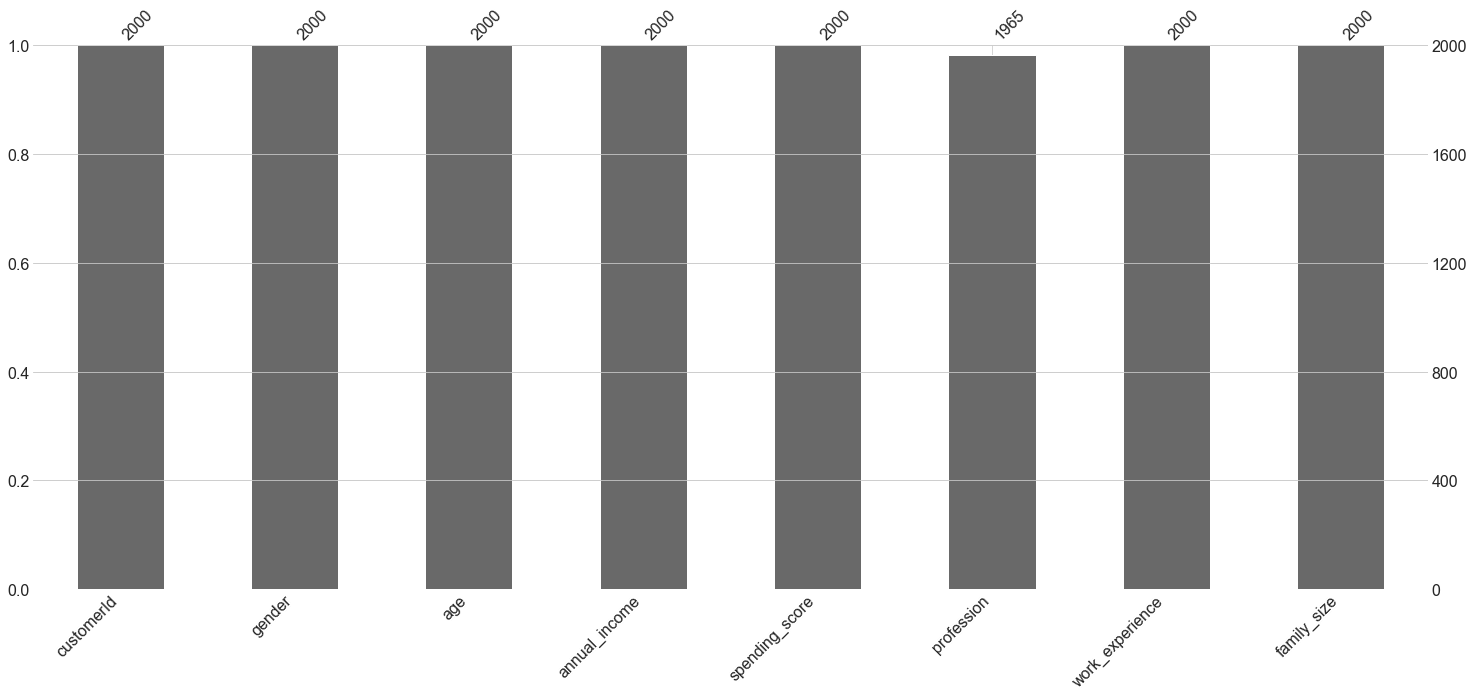

In [13]:
display(Markdown("### **Missing Values**"))
display(mns.bar(customer_df))

In [17]:
display(Markdown("### **Memory usage for each columns (in megabytes)**"))
display(customer_df.memory_usage(deep=True) / 1024**2)

### **Memory usage for each columns (in megabytes)**

Index              0.000122
customerId         0.015259
gender             0.118610
age                0.015259
annual_income      0.015259
spending_score     0.015259
profession         0.123178
work_experience    0.015259
family_size        0.015259
dtype: float64

In [6]:
gender_df = customer_df.gender.value_counts()
gender_df

Female    1186
Male       814
Name: gender, dtype: int64

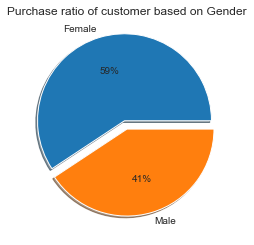

In [11]:
plt.figure(figsize=(6,4))
plt.title("Purchase ratio of customer based on Gender")
plt.pie(x=gender_df.values, labels=gender_df.index, explode=[0.1,0], autopct="%.f%%", shadow=True)
plt.show()

In [18]:
customer_df.profession.isna().any()

True

In [19]:
customer_df.profession.fillna(value="Unknown", inplace=True)
customer_df.profession.isna().any()

False

In [20]:
profession_df = customer_df.profession.value_counts()

profession_df

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Unknown           35
Name: profession, dtype: int64

[Text(0.5, 0, 'Count'), Text(0, 0.5, 'Professional Jobs')]

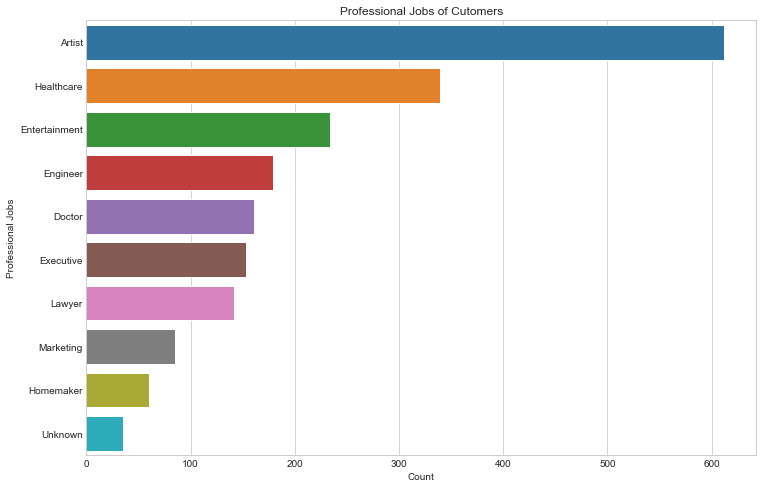

In [23]:
plt.figure(figsize=(12,8))
plt.title("Professional Jobs of Cutomers")
profession_df_plot = sns.barplot(x=profession_df.values, y=profession_df.index)
profession_df_plot.set(xlabel="Count", ylabel="Professional Jobs")